In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

###### Question 1
- Apply Hough transform (circular objects detection) and blob detection algorithm to detect coins present in image 'coins_1.jfif'. Comment on the outcomes of two methods.
 - Hough transform: the coins are successfully detected.
 - Blob detection: 
   - blobColor is important to select the bright blobs, if i change to any number than 255, the detection cant work

In [2]:
img = cv.imread('coins_1.jfif')

# grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.GaussianBlur(gray, (7, 7), 1.5)

# Hough circle transform
row = img.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150, param2 = 25)

# draw the circles
if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw both center and circles itself
        center = (i[0], i[1])
        cv.circle(img, center, 1, (100, 200, 0), 3)
        # radius
        radius = i[2]
        cv.circle(img, center, radius, (0, 100, 255), 2)
    
cv.imshow('circles', img)
cv.waitKey(0)

-1

In [3]:
# simple example
img = cv.imread('coins_1.jfif')
img = cv.medianBlur(img, 3)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
img_sharpen = cv.filter2D(img, -1, kernel)
gray = cv.cvtColor(img_sharpen, cv.COLOR_BGR2GRAY)
gray = cv.equalizeHist(gray)

# parameter setting 
params = cv.SimpleBlobDetector_Params()
#params.minThreshold = 10
#params.maxThreshold = 250
#params.thresholdStep = 5
#params.filterByArea = True
params.minArea = 500
#params.filterByCircularity = True
#params.minCircularity = 0
#params.filterByConvexity = False
#params.filterByInertia = False
#params.minRepeatability = 1
params.blobColor = 255
#params.filterByColor = True

# detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw the keypoints
im_with_keypoints = cv.drawKeypoints(img, keypoints, np.array([]), (0, 255, 0), 
                                    cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('blobs', im_with_keypoints)
cv.waitKey()

-1

###### Question 2
- Apply k-means clustering on 'zebra.jfif' to segment out the zebra
 - You are required to determine the optimal k by plotting the within cluster sum of squares vs number of clusters (2-10).
 - Apply the clustering method on 2 color space: BGR and HSV and compare the results obtained.

###### BGR

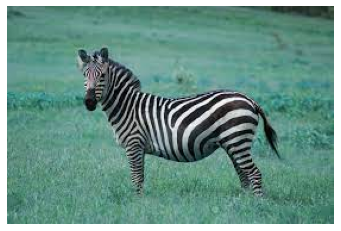

In [4]:
img = cv.imread('zebra.jfif')

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.show()

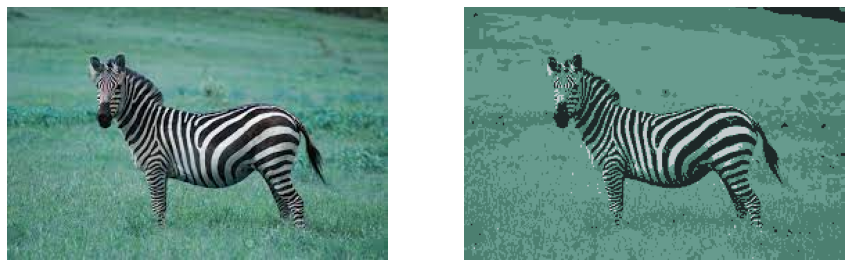

In [5]:
# reshape image
img_reshape = img.reshape((-1, 3))

img_reshape = np.float32(img_reshape)

# kmeans clustering
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# center
center = np.uint8(center)
# 
res = center[label.ravel()]
res_image = res.reshape(img.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(res_image)
plt.axis('off')
plt.show()

In [6]:
from numpy import linalg as LN

In [7]:
# less distance, more similarity
white = (255, 255, 255)

idx = np.argmin(LN.norm(white-center, axis = 1))

In [8]:
idx

1

In [9]:
# white petal
mask_petal = res_image == center[idx]
seg_result = img*(mask_petal.astype("uint8"))

cv.imshow('bgr segmentation', seg_result)
cv.waitKey(0)

-1

###### HSV

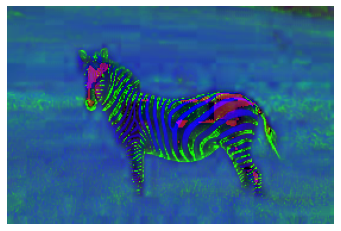

In [10]:
img = cv.imread('zebra.jfif')
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img_hsv)
plt.axis("off")
plt.show()

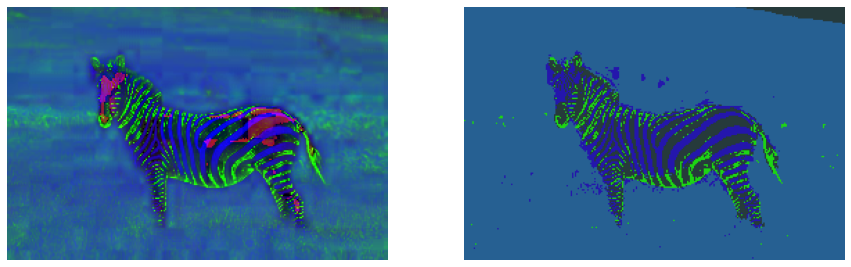

In [11]:
# reshape image
img_reshape = img_hsv.reshape((-1, 3))

img_reshape = np.float32(img_reshape)

# kmeans clustering
criteria = (cv.TERM_CRITERIA_EPS+cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
attempts = 10
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, cv.KMEANS_RANDOM_CENTERS)

# center
center = np.uint8(center)
# 
res = center[label.ravel()]
res_image = res.reshape(img_hsv.shape)

plt.figure(figsize = (15, 15))
plt.subplot(1, 2, 1)
plt.imshow(img_hsv)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(res_image)
plt.axis('off')
plt.show()

In [12]:
# less distance, more similarity
white = (0, 0, 255)

idx = np.argmin(LN.norm(white-center, axis = 1))

In [13]:
idx

0

In [14]:
# white petal
mask_petal = res_image == center[idx]
seg_result = img*(mask_petal.astype("uint8"))

cv.imshow('hsv segmentation', seg_result)
cv.waitKey(0)

-1